In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress
import ast



In [109]:


# Load the players file into a DataFrame
players = pd.read_csv('data/players.csv')

# Display the first few rows of the DataFrame
players.head(3)

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,NaN,Tekin,4502.0,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687.0
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,NaN,Sarr,3775.0,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423.0
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,NaN,Mandanda,3772.0,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,NaN,O. Mandanda,NaN


In [110]:
players.shape

(3603, 14)

In [ ]:

# Convert the birthDate column to datetime 
players['birthDate'] = pd.to_datetime(players['birthDate'], errors='coerce')


In [241]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   weight                   3603 non-null   int64         
 1   firstName                3603 non-null   object        
 2   lastName                 3603 non-null   object        
 3   currentTeamId            3468 non-null   float64       
 4   birthDate                3603 non-null   datetime64[ns]
 5   height                   3603 non-null   int64         
 6   wyId                     3603 non-null   int64         
 7   foot                     3551 non-null   object        
 8   shortName                3603 non-null   object        
 9   currentNationalTeamId    1357 non-null   float64       
 10  passportArea_name        3603 non-null   object        
 11  passportArea_id          3603 non-null   object        
 12  passportArea_alpha3code  3603 non-

In [112]:
#middleName is all null, so im just going to drop it now so it doesnt take up space on my screen
players.drop(['middleName'],axis=1, inplace=True)

currentTeamId, foot and currentNationalTeamId has nulls but I will leave them there for now

In [156]:
players['foot'].value_counts()

foot
right    2708
left      838
both        5
Name: count, dtype: int64

In [113]:
players.describe()

,weight,currentTeamId,height,wyId,currentNationalTeamId
count,3603.000000,3468.000000,3603.000000,3603.000000,1357.000000
mean,74.357757,4634.977797,178.494033,142407.543991,10435.886514
std,13.920990,6289.428109,27.172882,153687.689153,5732.018077
min,0.000000,8.000000,0.000000,12.000000,664.000000
25%,71.000000,1628.000000,178.000000,15981.000000,5629.000000
50%,76.000000,3162.000000,183.000000,70096.000000,10451.000000
75%,81.000000,3787.000000,187.000000,264883.500000,15594.000000
max,101.000000,63189.000000,203.000000,568583.000000,34101.000000


There are missing values where weight and height are zero.

In [114]:
(players['weight'] == 0).value_counts()

weight
False    3510
True       93
Name: count, dtype: int64

In [115]:
(players['height'] == 0).value_counts()

height
False    3526
True       77
Name: count, dtype: int64

In [116]:
players[players['weight'] == 0].equals(players[(players['height'] == 0) | (players['weight'] == 0)])


True

I can see that there are 93 players with no weight data. And 77 players with no height data. At least i can confirm that the players with no height data are a subset of the players with no weight data. I will leave them in for now. Maybe the players wont be that important to my research and i can remove them. But maybe weight and height wont be that important. Maybe I can impute the data. Maybe there are some important players in that list and I can find their height and information online and hardcode in the values.

In [154]:
(players[players['height']==0]).shape

(77, 21)

In [155]:
(players[players['weight']==0]).shape

(93, 21)

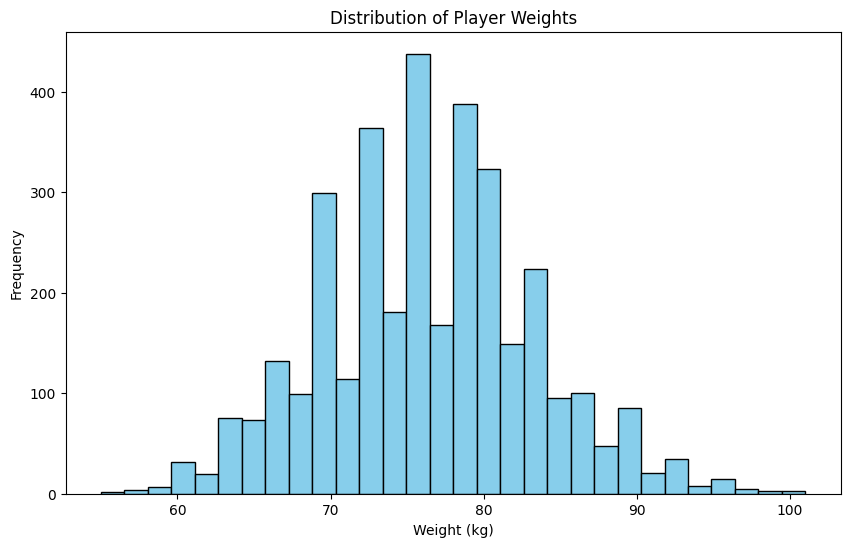

In [119]:
plt.figure(figsize=(10, 6))
plt.hist(players[players['weight']!=0]['weight'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Player Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

values seem to be discrete. Which makes sense because weights fluctuate a fair amount, so rounding to the closes kilogram makes sense.

In [120]:
#only whole numbers
players[(players['weight']>73)&(players['weight']<74)]['weight']

Series([], Name: weight, dtype: int64)

The histogram above looks a bit jagged. But that is just because the values are not exactly continuous. They are all whole numbers. So I can use a violin plot that estimates the probability density using a combination of KDE (kernel density estimation) and box plot. The plot belows confirms that. 

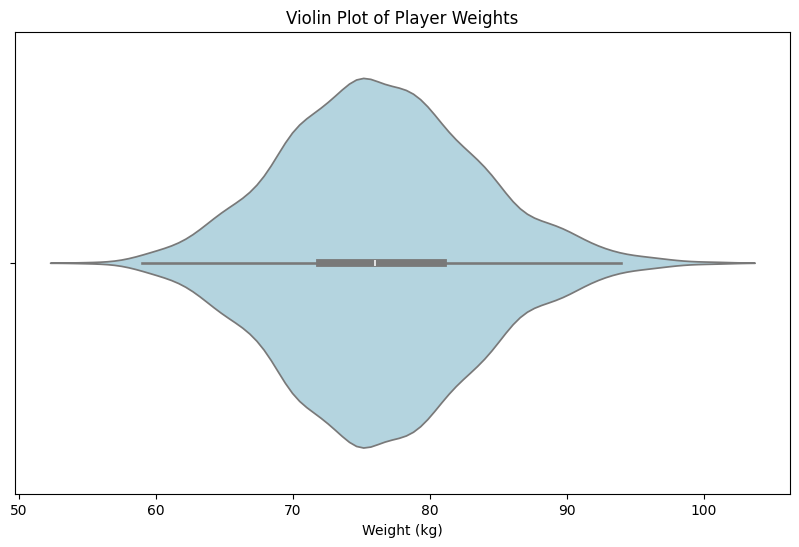

In [121]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=players[players['weight']!=0]['weight'], color='lightblue')
plt.title('Violin Plot of Player Weights')
plt.xlabel('Weight (kg)')
plt.show()

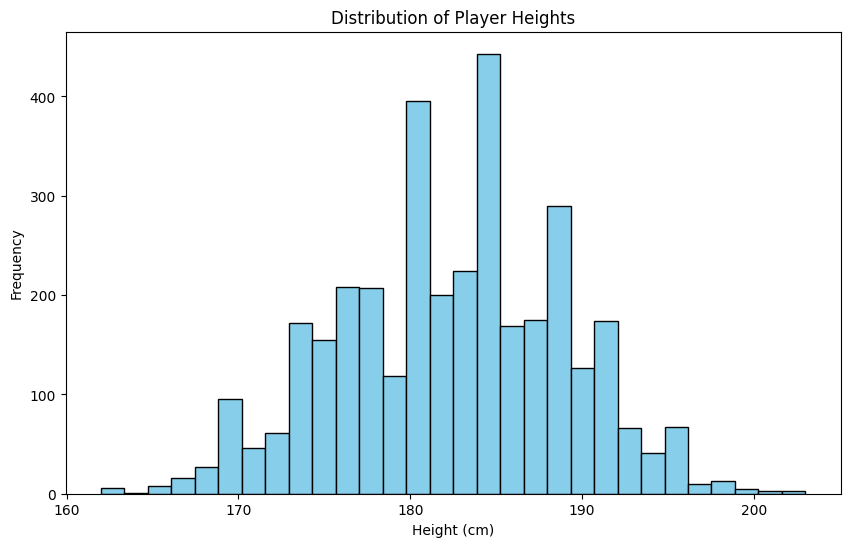

In [122]:
plt.figure(figsize=(10, 6))
plt.hist(players[players['height']!=0]['height'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Player Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

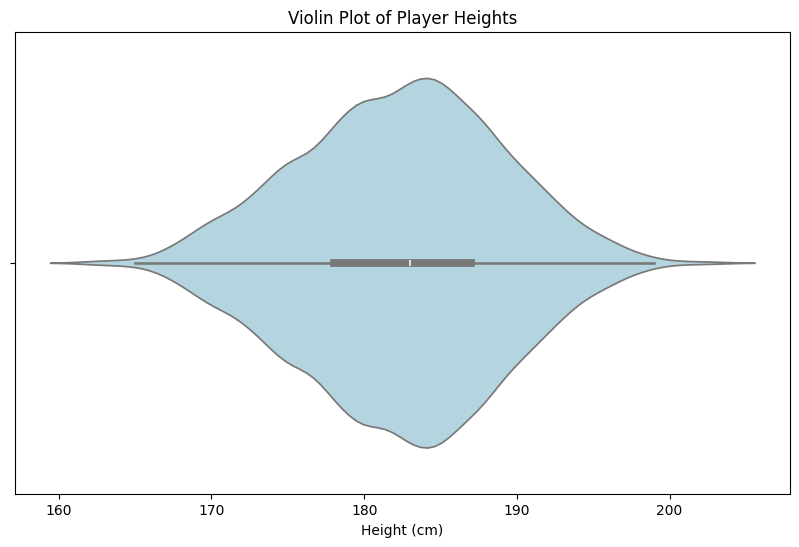

In [123]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=players[players['height']!=0]['height'], color='lightblue')
plt.title('Violin Plot of Player Heights')
plt.xlabel('Height (cm)')
plt.show()

Similar the weights, the heights are also rounded. but the violin plot shows a plot that makes sense with no unrealistic outliers. I find it interesting that it seems skewed to the right. A lot of players are around 185cm. I wonder if it is because defensive players and goalkeepers are often quite tall, so that skew is due to that.

In [124]:
#adding a regression line to check that weight and height make sense.
slope, intercept, r_value, p_value, std_err = linregress(players[players['weight']!=0]['height'], players[players['weight']!=0]['weight'])

# Formula for the regression line: weight = slope * height + intercept
print(f"Regression Line Formula: weight = {slope:.2f} * height + {intercept:.2f}")


Regression Line Formula: weight = 0.82 * height + -73.31


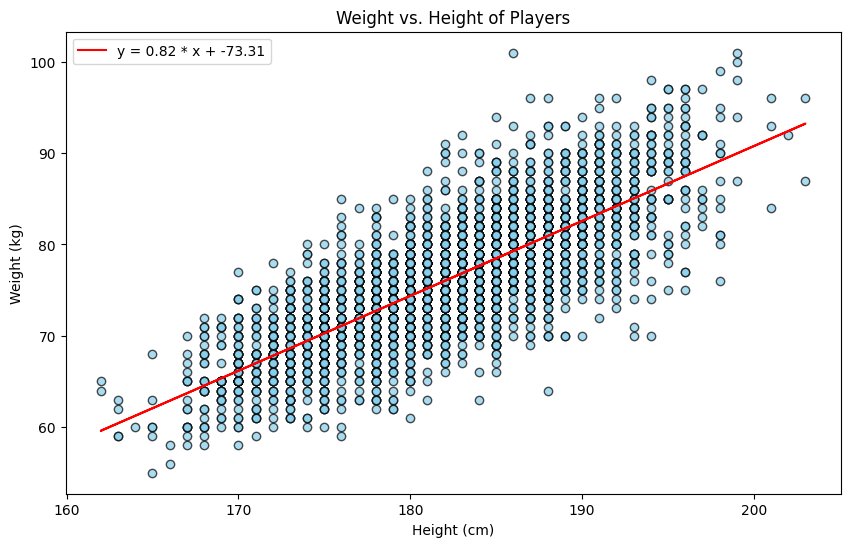

In [125]:

plt.figure(figsize=(10, 6))
plt.scatter(players[players['weight']!=0]['height'], players[players['weight']!=0]['weight'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Weight vs. Height of Players')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

# Generate values for the regression line
x_values = np.array(players[players['weight']!=0]['height'])
y_values = slope * x_values + intercept

# Plot the regression line in red
plt.plot(x_values, y_values, color='red', label=f"y = {slope:.2f} * x + {intercept:.2f}")
plt.legend()
plt.show()

In [126]:
players[(players['height']>187)&(players['weight']<65)]

,passportArea,weight,firstName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
2249,"{'name': 'Germany', 'id': '276', 'alpha3code':...",0,Florian,Mayer,2454.0,1998-03-04,190,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Germany', 'id': '276', 'alpha3code':...",391551,right,F. Mayer,NaN
3191,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",64,Rekeem,Harper,1627.0,2000-03-08,188,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",447254,right,R. Harper,2417.0


I checked Rekeem Harper's stats online because he looked a little bit of an extreme height to weight ratio compared to the rest of the data set. His height was confirmed, and i guess it is possible he was much younger at the time (this data refers to the 2017/2018 season so he would have been only 17 or 18 years old.

In [127]:
players.head()

,passportArea,weight,firstName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,Tekin,4502.0,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687.0
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,Sarr,3775.0,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423.0
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,Mandanda,3772.0,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,NaN,O. Mandanda,NaN
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,N'Diaye,683.0,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314.0
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,Konat\u00e9,2975.0,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,NaN


Need to extract the info from the passportArea, birthArea and role dictionary columns

In [128]:
players['passportArea'][0]

"{'name': 'Turkey', 'id': '792', 'alpha3code': 'TUR', 'alpha2code': 'TR'}"

In [129]:
import ast

def convert_to_dict(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)  # Safely evaluate the string to a dict
        except (ValueError, SyntaxError):
            return {}  # Return an empty dict if conversion fails
    elif isinstance(value, dict):
        return value  # Already a dict
    return {}  # Return an empty dict for any other type



In [130]:
# Apply the conversion function to the passportArea column
players['passportArea'] = players['passportArea'].apply(convert_to_dict)

In [131]:
# Use pd.json_normalize to expand the passportArea column
passport_area_expanded = pd.json_normalize(players['passportArea'])

# Rename columns to avoid conflicts (optional)
passport_area_expanded.columns = [f"passportArea_{col}" for col in passport_area_expanded.columns]

# Concatenate the expanded columns back with the original DataFrame
players = pd.concat([players, passport_area_expanded], axis=1)

# Drop the original 'passportArea' column if you no longer need it
players = players.drop(columns=['passportArea'])

In [136]:
players['birthArea'][0]

{'name': 'Turkey', 'id': '792', 'alpha3code': 'TUR', 'alpha2code': 'TR'}

In [137]:
# Apply the conversion function to the passportArea column
players['birthArea'] = players['birthArea'].apply(convert_to_dict)

In [139]:
# Expand the 'passportArea' column
birth_area_expanded = pd.json_normalize(players['birthArea'])

# Rename columns to avoid conflicts (optional)
birth_area_expanded.columns = [f"birthArea_{col}" for col in birth_area_expanded.columns]

# Concatenate the expanded columns back with the original DataFrame
players = pd.concat([players, birth_area_expanded], axis=1)

# Drop the original 'passportArea' column if you no longer need it
players = players.drop(columns=['birthArea'])



,weight,firstName,lastName,currentTeamId,birthDate,height,role,wyId,foot,shortName,currentNationalTeamId,passportArea_name,passportArea_id,passportArea_alpha3code,passportArea_alpha2code,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code
0,78,Harun,Tekin,4502.0,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",32777,right,H. Tekin,4687.0,Turkey,792,TUR,TR,Turkey,792,TUR,TR
1,73,Malang,Sarr,3775.0,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",393228,left,M. Sarr,4423.0,Senegal,686,SEN,SN,France,250,FRA,FR
2,72,Over,Mandanda,3772.0,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",393230,NaN,O. Mandanda,NaN,France,250,FRA,FR,France,250,FRA,FR
3,82,Alfred John Momar,N'Diaye,683.0,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",32793,right,A. N'Diaye,19314.0,Senegal,686,SEN,SN,France,250,FRA,FR
4,84,Ibrahima,Konat\u00e9,2975.0,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",393247,right,I. Konat\u00e9,NaN,France,250,FRA,FR,France,250,FRA,FR


In [84]:
players['role'][0]

"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalkeeper'}"

In [141]:
# Apply the conversion function to the passportArea column
players['role'] = players['role'].apply(convert_to_dict)

In [142]:
# Expand the 'passportArea' column
role_expanded = pd.json_normalize(players['role'])

# Rename columns to avoid conflicts (optional)
role_expanded.columns = [f"role_{col}" for col in role_expanded.columns]

# Concatenate the expanded columns back with the original DataFrame
players = pd.concat([players, role_expanded], axis=1)

# Drop the original 'passportArea' column if you no longer need it
players = players.drop(columns=['role'])

In [143]:
players.head()

,weight,firstName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,currentNationalTeamId,...,passportArea_id,passportArea_alpha3code,passportArea_alpha2code,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code,role_code2,role_code3,role_name
0,78,Harun,Tekin,4502.0,1989-06-17,187,32777,right,H. Tekin,4687.0,...,792,TUR,TR,Turkey,792,TUR,TR,GK,GKP,Goalkeeper
1,73,Malang,Sarr,3775.0,1999-01-23,182,393228,left,M. Sarr,4423.0,...,686,SEN,SN,France,250,FRA,FR,DF,DEF,Defender
2,72,Over,Mandanda,3772.0,1998-10-26,176,393230,NaN,O. Mandanda,NaN,...,250,FRA,FR,France,250,FRA,FR,GK,GKP,Goalkeeper
3,82,Alfred John Momar,N'Diaye,683.0,1990-03-06,187,32793,right,A. N'Diaye,19314.0,...,686,SEN,SN,France,250,FRA,FR,MD,MID,Midfielder
4,84,Ibrahima,Konat\u00e9,2975.0,1999-05-25,192,393247,right,I. Konat\u00e9,NaN,...,250,FRA,FR,France,250,FRA,FR,DF,DEF,Defender


In [163]:
players['role_name'].value_counts()

role_name
Midfielder    1257
Defender      1200
Forward        720
Goalkeeper     426
Name: count, dtype: int64

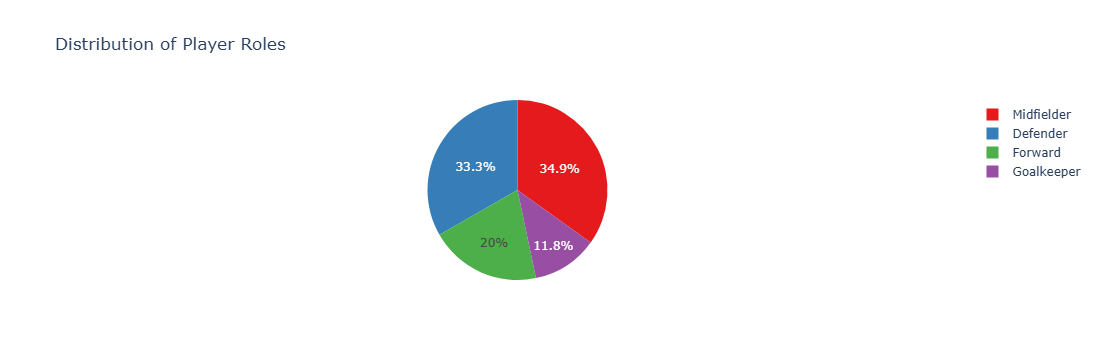

In [165]:

# Get the value counts for role_name
role_counts = players['role_name'].value_counts().reset_index()
role_counts.columns = ['Role Name', 'Count']  # Rename columns for clarity

# Create a pie chart
fig = px.pie(role_counts, names='Role Name', values='Count', 
             title='Distribution of Player Roles', 
             color='Role Name', 
             color_discrete_sequence=px.colors.qualitative.Set1)

# Show the figure
fig.show()

makes sense to have mostly defenders and midfielders

### Birth Area

In [167]:
players['birthArea_name'].value_counts().sort_values(ascending=False)

birthArea_name
France          500
Spain           421
Italy           337
Germany         308
England         254
               ... 
Uganda            1
Uzbekistan        1
Moldova           1
Cura\u00e7ao      1
Iraq              1
Name: count, Length: 115, dtype: int64

In [198]:
players['birthArea_alpha3code'].value_counts().sort_values(ascending=False)

birthArea_alpha3code
FRA    500
ESP    421
ITA    337
DEU    308
XEN    254
      ... 
UGA      1
UZB      1
MHL      1
CUW      1
IRQ      1
Name: count, Length: 115, dtype: int64

In [178]:
players['birthArea_alpha2code'].value_counts().sort_values(ascending=False)

birthArea_alpha2code
FR    500
ES    421
IT    337
      311
DE    308
     ... 
NC      1
MH      1
SS      1
AE      1
PK      1
Name: count, Length: 111, dtype: int64

In [183]:
len(players[players['birthArea_alpha3code']==''])

0

In [184]:
len(players[players['birthArea_alpha2code']==''])

311

In [186]:
(players[players['birthArea_alpha2code']==''])['birthArea_alpha3code'].value_counts()

birthArea_alpha3code
XEN    254
XNI     21
XWA     16
XSC     13
XKS      7
Name: count, dtype: int64

In [187]:
(players[players['birthArea_alpha2code']==''])['birthArea_name'].value_counts()

birthArea_name
England             254
Northern Ireland     21
Wales                16
Scotland             13
Kosovo                7
Name: count, dtype: int64

Seems the alpha3code is more reliable than  alpha2code. but i will leave it in for now in case I need it for joins. I can populate it with information from alpha3code or name if i need.

### passport info

In [188]:
players['passportArea_alpha3code'].value_counts().sort_values(ascending=False)

passportArea_alpha3code
ESP    473
ITA    450
FRA    307
DEU    245
XEN    171
      ... 
TZA      1
SDN      1
IRQ      1
LAO      1
BGD      1
Name: count, Length: 137, dtype: int64

In [189]:
players['passportArea_alpha2code'].value_counts().sort_values(ascending=False)

passportArea_alpha2code
ES    473
IT    450
FR    307
      246
DE    245
     ... 
BD      1
PH      1
RW      1
LA      1
KZ      1
Name: count, Length: 133, dtype: int64

In [191]:
(players[players['passportArea_alpha2code']==''])['passportArea_alpha3code'].value_counts()

passportArea_alpha3code
XEN    171
XWA     32
XNI     24
XSC     17
XKS      2
Name: count, dtype: int64

Similar situation with the passport alpha codes.

In [199]:
#pd.set_option('display.max_rows', None)
#players['birthArea_name'].value_counts().sort_values(ascending=False)

#eyeballed all the countries and dont seem to be any obvious typos


In [197]:
pd.reset_option('display.max_rows')

### Age

Now I want to get the age of each player based upon their DOB and the year that this data was based on. It was based on the 2017/2018 Season. So I think I will get the ages of all players on January 1st 2018 (mid way through the season).

In [203]:
players['birthDate'].dtype

dtype('O')

In [205]:
# Convert the birthDate column to datetime
players['birthDate'] = pd.to_datetime(players['birthDate'])

In [206]:
# Define the reference date (2018-01-01)
reference_date = pd.to_datetime('2018-01-01')

In [207]:
# Calculate the age
players['age'] = (reference_date - players['birthDate']).dt.days // 365

In [208]:
players.head()

,weight,firstName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,currentNationalTeamId,...,passportArea_alpha3code,passportArea_alpha2code,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code,role_code2,role_code3,role_name,age
0,78,Harun,Tekin,4502.0,1989-06-17,187,32777,right,H. Tekin,4687.0,...,TUR,TR,Turkey,792,TUR,TR,GK,GKP,Goalkeeper,28
1,73,Malang,Sarr,3775.0,1999-01-23,182,393228,left,M. Sarr,4423.0,...,SEN,SN,France,250,FRA,FR,DF,DEF,Defender,18
2,72,Over,Mandanda,3772.0,1998-10-26,176,393230,NaN,O. Mandanda,NaN,...,FRA,FR,France,250,FRA,FR,GK,GKP,Goalkeeper,19
3,82,Alfred John Momar,N'Diaye,683.0,1990-03-06,187,32793,right,A. N'Diaye,19314.0,...,SEN,SN,France,250,FRA,FR,MD,MID,Midfielder,27
4,84,Ibrahima,Konat\u00e9,2975.0,1999-05-25,192,393247,right,I. Konat\u00e9,NaN,...,FRA,FR,France,250,FRA,FR,DF,DEF,Defender,18


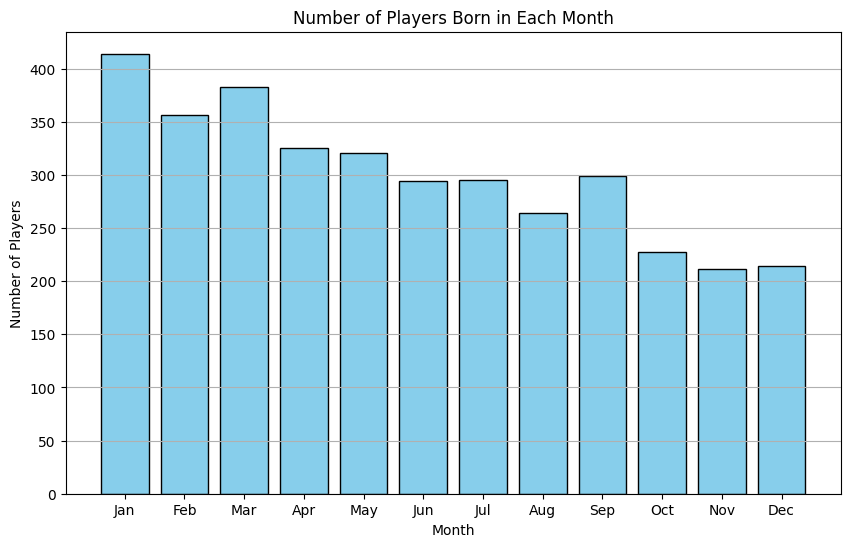

In [209]:

# Extract the month from the birthDate
players['birthMonth'] = players['birthDate'].dt.month

# Count the occurrences of each month
month_counts = players['birthMonth'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(month_counts.index, month_counts.values, color='skyblue', edgecolor='black')
plt.title('Number of Players Born in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Players')
plt.xticks(month_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


I decided to plot this out of curiousity. I wasnt expecting much. But this seems very odd to me. I cant think of a good explanation for this yet.
I know birth rates can vary seasonally and i have read that conception rates are higher in winter months.

Another possible explanation is that kids are affected by yearly cutoffs when it comes to what age group they play with. I remember this when I was playing sports too. You are often put in a certain age group based on what year you were born in. So kids born in January will be 10-12 months older than kids born in December in younger age groups. Potentiall putting them at an advantage when it comes to progressing in their career. Still seems odd to me though. I might investigate this further and see if theres any good hypotheses out there.

I will plot age next, if it skews to include a lot of younger footballers then maybe that could affect the table result above. Maybe some of the youth players just recently got promoted to the senior teams and are therefore included in this data.

In [211]:
players[['age']].describe()

,age
count,3603.000000
mean,25.645851
std,4.826821
min,15.000000
25%,22.000000
50%,25.000000
75%,29.000000
max,44.000000


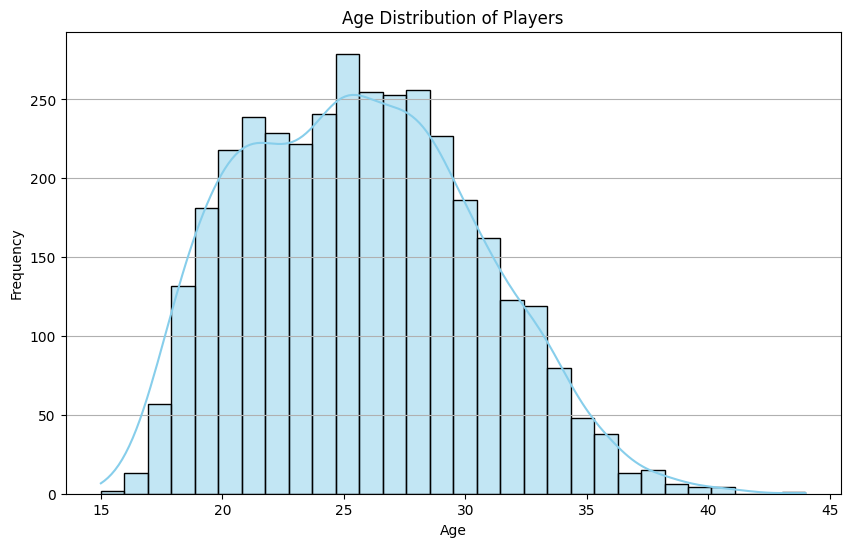

In [218]:
plt.figure(figsize=(10, 6))
sns.histplot(players['age'], bins=30, kde=True, color='skyblue')  # kde=True adds a kernel density estimate
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

There are 2 peaks here. I believe the bigger one is the more natural distribution. The smaller one to the left (around age 21) indicates to me that there is always a fresh batch of young players being promoted to the senior team. A lot of these younger players dont stay at their team and are often loaned out or sold to teams in lower leagues to get more experience. Lower leagues are not included in this data. 

In [219]:
players.head()

,weight,firstName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,currentNationalTeamId,...,passportArea_alpha2code,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code,role_code2,role_code3,role_name,age,birthMonth
0,78,Harun,Tekin,4502.0,1989-06-17,187,32777,right,H. Tekin,4687.0,...,TR,Turkey,792,TUR,TR,GK,GKP,Goalkeeper,28,6
1,73,Malang,Sarr,3775.0,1999-01-23,182,393228,left,M. Sarr,4423.0,...,SN,France,250,FRA,FR,DF,DEF,Defender,18,1
2,72,Over,Mandanda,3772.0,1998-10-26,176,393230,NaN,O. Mandanda,NaN,...,FR,France,250,FRA,FR,GK,GKP,Goalkeeper,19,10
3,82,Alfred John Momar,N'Diaye,683.0,1990-03-06,187,32793,right,A. N'Diaye,19314.0,...,SN,France,250,FRA,FR,MD,MID,Midfielder,27,3
4,84,Ibrahima,Konat\u00e9,2975.0,1999-05-25,192,393247,right,I. Konat\u00e9,NaN,...,FR,France,250,FRA,FR,DF,DEF,Defender,18,5


## Team's data

In [7]:
teams=pd.read_csv('data/teams.csv')
teams.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [267]:
# Apply the conversion function to the passportArea column
teams['area'] = teams['area'].apply(convert_to_dict)

In [268]:
# Expand the 'passportArea' column
area_expanded = pd.json_normalize(teams['area'])

# Rename columns to avoid conflicts (optional)
area_expanded.columns = [f"area_{col}" for col in area_expanded.columns]

# Concatenate the expanded columns back with the original DataFrame
teams = pd.concat([teams, area_expanded], axis=1)

# Drop the original 'passportArea' column if you no longer need it
teams = teams.drop(columns=['area'])

In [272]:
teams.head()

,city,name,wyId,officialName,type,area_name,area_id,area_alpha3code,area_alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES


In [287]:
teams[['area_alpha3code','area_alpha2code','area_name']].value_counts().reset_index().sort_values(by=['area_alpha2code']).head()

,area_alpha3code,area_alpha2code,area_name,count
44,XNI,,Northern Ireland,1
3,XEN,,England,20
5,XWA,,Wales,2
12,ALB,AL,Albania,1
9,ARG,AR,Argentina,1


I can see again that the aplha 2 code is null for nothern ireland, england and wales. So i still plan to use the alpha3code instead of the 2code.

I was wondering what northern ireland team would be involved...then i checked and realised that national teams are also included here. Nice! I was wondering about that, because i find that more interesting than the country of birth or their passport. Knowing if they play internationally feels more interesting to me

In [290]:
teams['type'].value_counts()

type
club        98
national    44
Name: count, dtype: int64

In [293]:
#teams[teams['type']=='national']

In [296]:
players.iloc[0]

weight                                      78
firstName                                Harun
lastName                                 Tekin
currentTeamId                           4502.0
birthDate                  1989-06-17 00:00:00
height                                     187
wyId                                     32777
foot                                     right
shortName                             H. Tekin
currentNationalTeamId                   4687.0
passportArea_name                       Turkey
passportArea_id                            792
passportArea_alpha3code                    TUR
passportArea_alpha2code                     TR
birthArea_name                          Turkey
birthArea_id                               792
birthArea_alpha3code                       TUR
birthArea_alpha2code                        TR
role_code2                                  GK
role_code3                                 GKP
role_name                           Goalkeeper
age          

In [298]:
teams.iloc[0]

city               Newcastle upon Tyne
name                  Newcastle United
wyId                              1613
officialName       Newcastle United FC
type                              club
area_name                      England
area_id                              0
area_alpha3code                    XEN
area_alpha2code                       
Name: 0, dtype: object

I know from reading the documentation of the dataset that the players(currentTeamId and currentNationalTeamId) will link to teams (wyId)
I will do some joins there to make sure its working nicely and most the data joins successfully

In [306]:
teams.columns.intersection(players.columns)

Index(['wyId'], dtype='object')

In [305]:
#left join the teams table (it contains all the football teams across other leagues that im not currently interested in) to the players data

players_teams=players.merge(teams, how='left', left_on='currentTeamId', right_on='wyId')


In [312]:
players_teams['officialName'].isna().value_counts()

officialName
False    2439
True     1164
Name: count, dtype: int64

In [321]:
players_teams[players_teams['officialName'].isna()].head()

,weight,firstName,lastName,currentTeamId,birthDate,height,wyId_x,foot,shortName,currentNationalTeamId,...,birthMonth,city,name,wyId_y,officialName,type,area_name,area_id,area_alpha3code,area_alpha2code
0,78,Harun,Tekin,4502.0,1989-06-17,187,32777,right,H. Tekin,4687.0,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,78,Karim,El Ahmadi Al Aroos,16469.0,1985-01-27,179,142,right,K. El Ahmadi,16216.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,86,Volkan,Babacan,4535.0,1988-08-11,192,32923,right,V. Babacan,4687.0,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,77,Nordin,Amrabat,16470.0,1987-03-31,178,32968,right,N. Amrabat,16216.0,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,78,Andr\u00e9,Ramalho Silva,8743.0,1992-02-16,182,65880,right,Andr\u00e9 Ramalho,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
players_teams[players_teams['officialName']=='Arsenal FC'].head()

,weight,firstName,lastName,currentTeamId,birthDate,height,wyId_x,foot,shortName,currentNationalTeamId,...,birthMonth,city,name,wyId_y,officialName,type,area_name,area_id,area_alpha3code,area_alpha2code
52,75,Alex,Iwobi,1609.0,1996-05-03,180,230020,right,A. Iwobi,16823.0,...,5,London,Arsenal,1609.0,Arsenal FC,club,England,0,XEN,
182,76,Mesut,\u00d6zil,1609.0,1988-10-15,180,3319,left,M. \u00d6zil,3148.0,...,10,London,Arsenal,1609.0,Arsenal FC,club,England,0,XEN,
549,64,Lucas,Torreira Di Pascua,1609.0,1996-02-11,168,333571,right,L. Torreira,15670.0,...,2,London,Arsenal,1609.0,Arsenal FC,club,England,0,XEN,
681,73,Daniel Nii,Tackie Mensah Welbeck,1609.0,1990-11-26,185,7945,right,D. Welbeck,2413.0,...,11,London,Arsenal,1609.0,Arsenal FC,club,England,0,XEN,
1280,82,Granit,Xhaka,1609.0,1992-09-27,185,49876,left,G. Xhaka,6697.0,...,9,London,Arsenal,1609.0,Arsenal FC,club,England,0,XEN,


In [326]:
players_teams[players_teams['area_name']=='England']['officialName'].value_counts()

officialName
Stoke City FC                26
Tottenham Hotspur FC         25
Leicester City FC            24
Newcastle United FC          24
Chelsea FC                   24
Manchester City FC           24
Manchester United FC         24
Watford FC                   23
AFC Bournemouth              23
Crystal Palace FC            23
Burnley FC                   22
West Bromwich Albion FC      22
Liverpool FC                 22
Huddersfield Town FC         21
Southampton FC               21
Everton FC                   21
Arsenal FC                   20
Brighton & Hove Albion FC    18
West Ham United FC           18
Name: count, dtype: int64

In [327]:
players_teams[players_teams['area_name']=='Wales']['officialName'].value_counts()

officialName
Swansea City AFC    17
Name: count, dtype: int64

There are a lot of nulls, so i wanted to make sure that there was data for the teams I am interested in (the 20 premier league teams)
I checked, and there were only 19 teams. So I wanted to see what team was missing. It was Swansea, and they are actually based in Wales. So I need to remember to include them when filtering. 

I have a good amount of data. but only 18 playeers for brighton and westham is low. I know they used more than 18 players that year. So I will see to see if i can find a player from West ham in the table and see why they werent included in the join.

In [335]:
players_teams[players_teams['officialName']=='West Ham United FC'].head()

,weight,firstName,lastName,currentTeamId,birthDate,height,wyId_x,foot,shortName,currentNationalTeamId,...,birthMonth,city,name,wyId_y,officialName,type,area_name,area_id,area_alpha3code,area_alpha2code
654,83,\u0141ukasz,Fabia\u0144ski,1633.0,1985-04-18,190,7847,right,\u0141. Fabia\u0144ski,13869.0,...,4,London,West Ham United,1633.0,West Ham United FC,club,England,0,XEN,
680,73,Javier,Hern\u00e1ndez Balc\u00e1zar,1633.0,1988-06-01,175,7941,right,J. Hern\u00e1ndez,15473.0,...,6,London,West Ham United,1633.0,West Ham United FC,club,England,0,XEN,
2108,80,Carlos Alberto,S\u00e1nchez Moreno,1633.0,1986-02-06,182,26518,right,C. S\u00e1nchez,12430.0,...,2,London,West Ham United,1633.0,West Ham United FC,club,England,0,XEN,
2477,83,Marko,Arnautovi\u0107,1633.0,1989-04-19,192,14703,right,M. Arnautovi\u0107,9109.0,...,4,London,West Ham United,1633.0,West Ham United FC,club,England,0,XEN,
2818,86,Angelo,Obinze Ogbonna,1633.0,1988-05-23,191,21100,left,A. Ogbonna,NaN,...,5,London,West Ham United,1633.0,West Ham United FC,club,England,0,XEN,


In [333]:
players_teams[players_teams['lastName']=='Hart']

,weight,firstName,lastName,currentTeamId,birthDate,height,wyId_x,foot,shortName,currentNationalTeamId,...,birthMonth,city,name,wyId_y,officialName,type,area_name,area_id,area_alpha3code,area_alpha2code
2810,83,Joe,Hart,1646.0,1987-04-19,194,8301,right,J. Hart,NaN,...,4,"Burnley, Lancashire",Burnley,1646.0,Burnley FC,club,England,0,XEN,


I investigated and it didnt make sense that Łukasz Fabiański is playing for West Ham and this season. And it didnt make sense that Joe Hart is playing for Burnley either. So it seems that the players that changed clubs in August of 2018 are set to that new club. This data must have been generated after the summer of 2018 and the player's clubs may be different to who they played with that season. 

I may need to be aware of this later and do some filtering. And actually the events_England dataset has games with both players and teams wyId, so i will be able to figure out what player played at what team during the time frame I am interested in.

On further reflection and examining the data, the Teams data doesnt seem it will be useful at all for getting the player's club information. But I can get their national team information from it. And I guess i can also use it to see if their club team changed in the summer after the season I am examining. A player leaving the club in the future could possibly have an impact on the result of the game. Players can leave for various reasons, perhaps they are deemed not good enough for the team, but perhaps they are playing so well that other teams want to sign that player.